<a href="https://colab.research.google.com/github/sangeetharajagopal/AI-ML/blob/main/AIML_ML_Project_full_code_notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
all_life_bank_data = pd.read_csv("/content/Loan_Modelling.csv")

In [6]:
#coping the data to another variable to avoid changes to original data
data = all_life_bank_data.copy()

## Data Overview

* Observations
* Sanity checks

In [7]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Understand the shape of data set

In [9]:
data.shape

(5000, 14)

There are 5000 rows and 14 columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the data type are numeric

Checking for the missing values

In [11]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


There are no null values present in the data set

Checking for duplicates

In [12]:
data.duplicated().sum()

np.int64(0)

There are no duplicate values

Checking to drop the ID column

In [13]:
data.ID.nunique()

5000

In [14]:
data.drop("ID",axis=1,inplace=True)

Statistical summary of data

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


Average(mean) age of the customers is 45,minimum age of 23 and max age of 67 years. Over 50% of the customers in the dataset are aged 45 years and above

There seems to be an error on the minimum professional experience age (-3 ) but the maximum age of customers is 43 years

Income ranges from 8,000 USD TO 224,000 USD with an average income of approximately 74,000 USD

Zipcodes are not clear and need to be checked and droped

The average family size for each customer is 2 with 50% of all customers having a family size of 2 and max of 4.

The average value of mortgages held by each customer is around 56,000 USD with a standard deviation of 101,000 USD and maximum of 635,000 USD.

For other columns from personal loan to credit card are categorical seems to have further more analysis

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Univariate analysis

Analysis for Age column

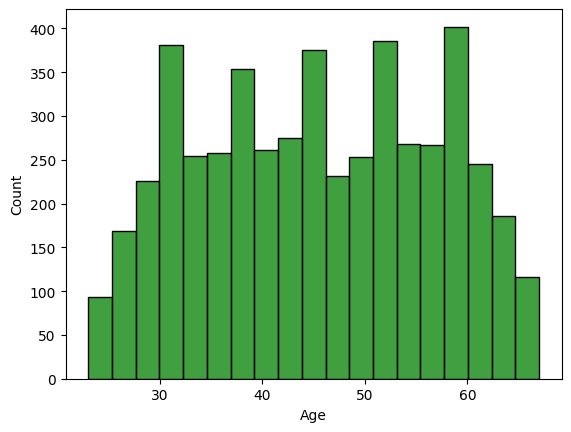

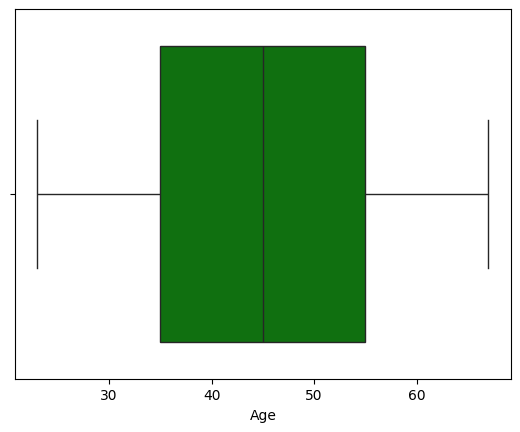

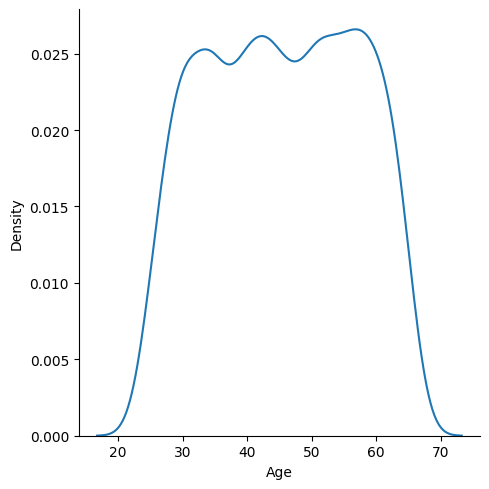

In [16]:
sns.histplot(data=data, x='Age',color='green')
plt.show()
sns.boxplot(data=data,x="Age",color="green")
plt.show()
sns.displot(data=data,x='Age',kind='kde')
plt.show()

Normal distribution of Age starts from mid of 20's and end age within 70

Analysis for Experience

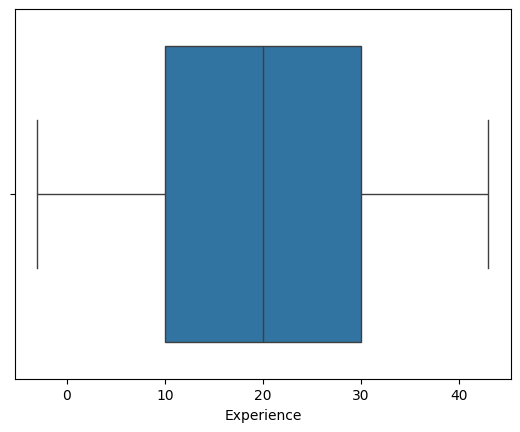

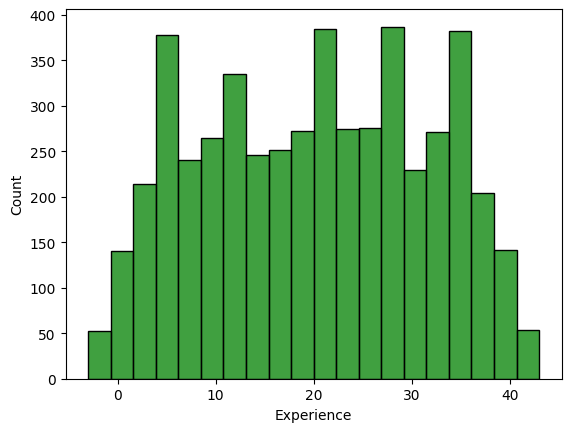

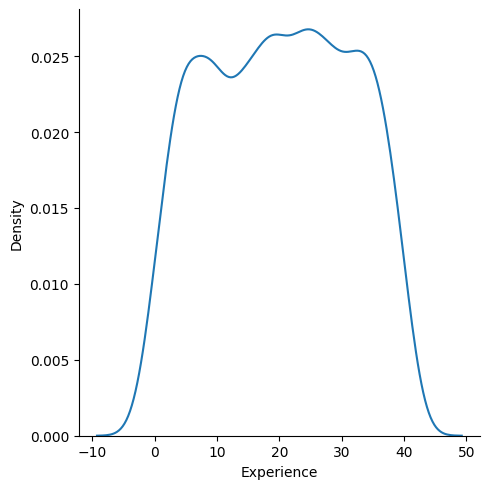

In [17]:
sns.boxplot(data=data, x= "Experience")
plt.show()
sns.histplot(data=data, x='Experience',color='green')
plt.show()
sns.displot(data=data,x='Experience',kind='kde')
plt.show()

Experience is also normal distribution

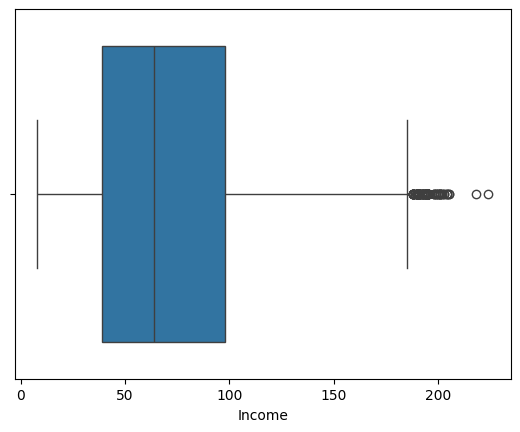

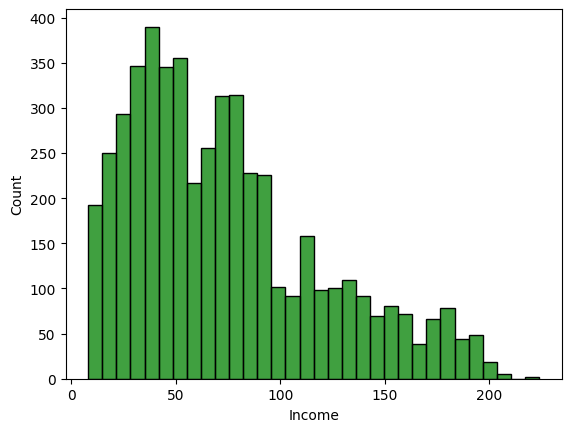

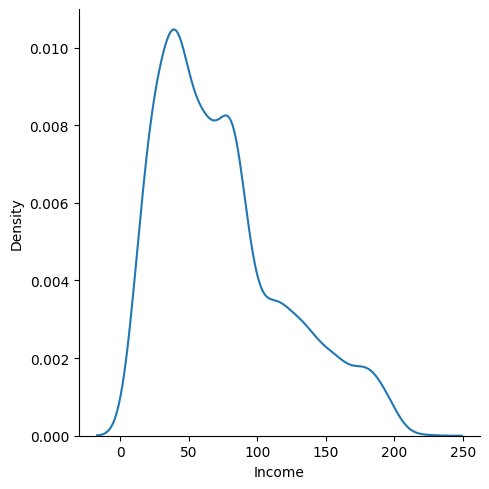

In [18]:
sns.boxplot(data=data, x= "Income")
plt.show()
sns.histplot(data=data, x='Income',color='green')
plt.show()
sns.displot(data=data,x='Income',kind='kde')
plt.show()

Income is right skewed

Could see outliers in the data

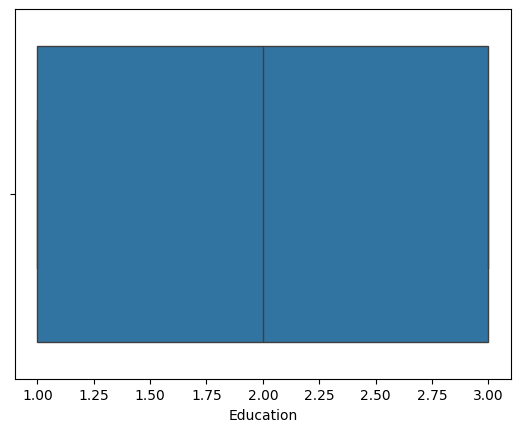

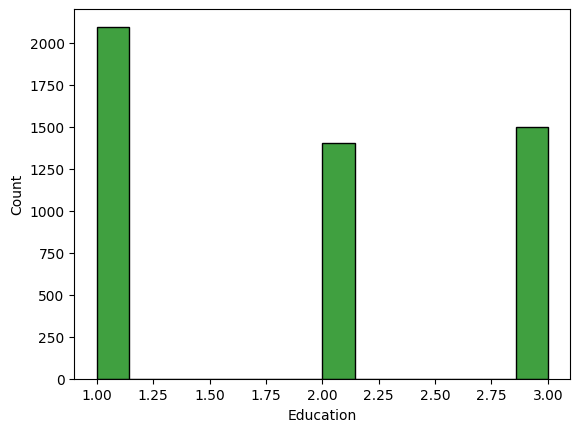

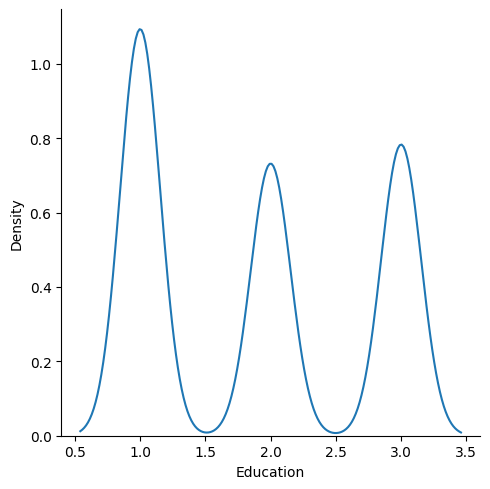

In [19]:
sns.boxplot(data=data, x= "Education")
plt.show()
sns.histplot(data=data, x='Education',color='green')
plt.show()
sns.displot(data=data,x='Education',kind='kde')
plt.show()

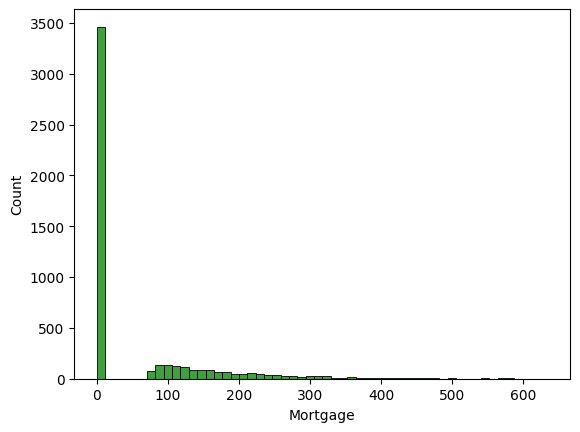

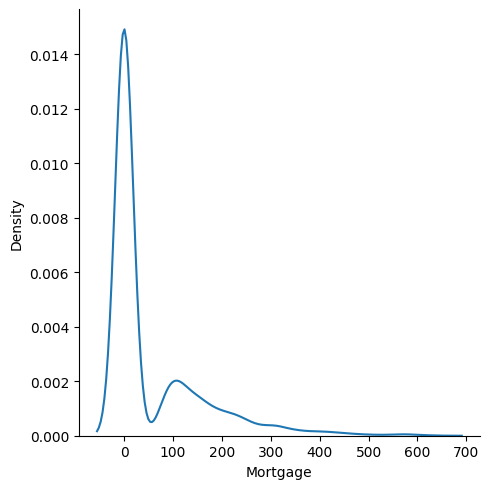

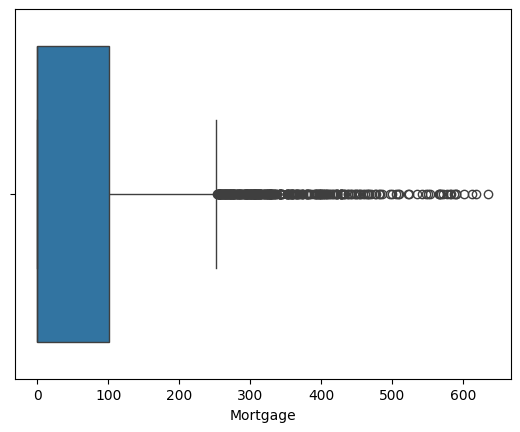

In [20]:
#1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

sns.histplot(data=data, x='Mortgage',color='green')
plt.show()
sns.displot(data=data,x='Mortgage',kind='kde')
plt.show()
sns.boxplot(data=data, x= "Mortgage")
plt.show()

The distribution of mortage attribute seems to be right skewed as the tail goes to the right and there are outliers found.

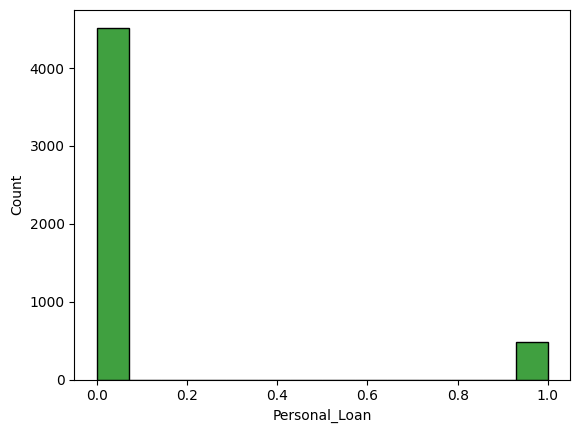

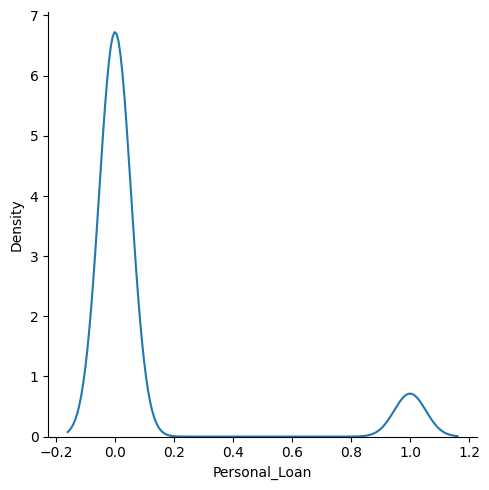

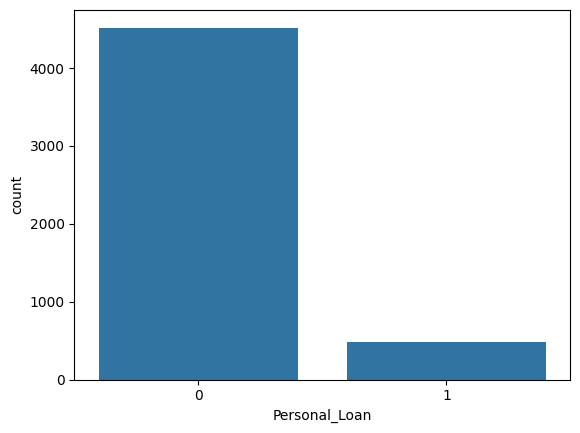

In [21]:

sns.histplot(data=data, x='Personal_Loan',color='green')
plt.show()
sns.displot(data=data,x='Personal_Loan',kind='kde')
plt.show()
sns.countplot(data=data,x='Personal_Loan')
plt.show()


From the analysis could see that the number of people opted for personal loan is very less percentage.

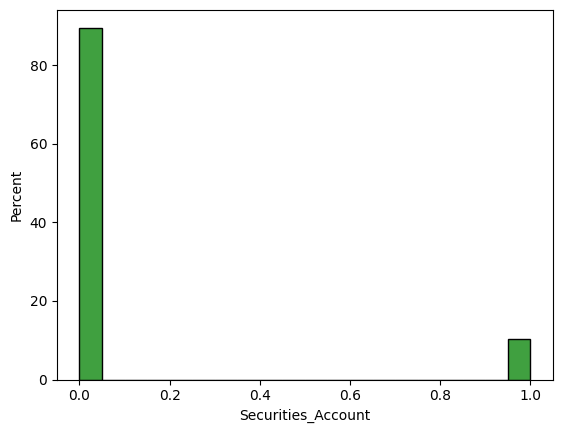

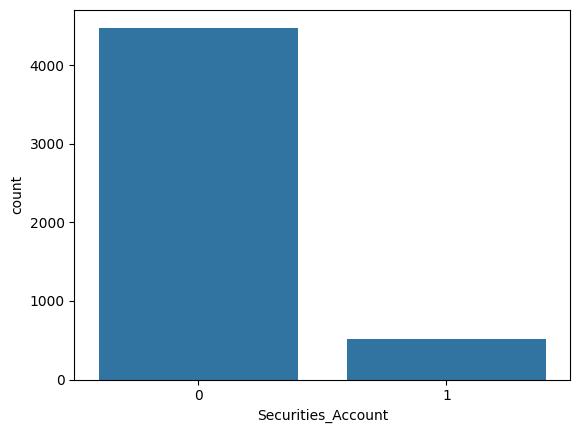

In [22]:
sns.histplot(data=data, x='Securities_Account',color='green',stat="percent",bins=20)
plt.show()

sns.countplot(data=data,x='Securities_Account')
plt.show()

Only fewer person(less than 20%) has securities with bank, who has no security seems to be leading.

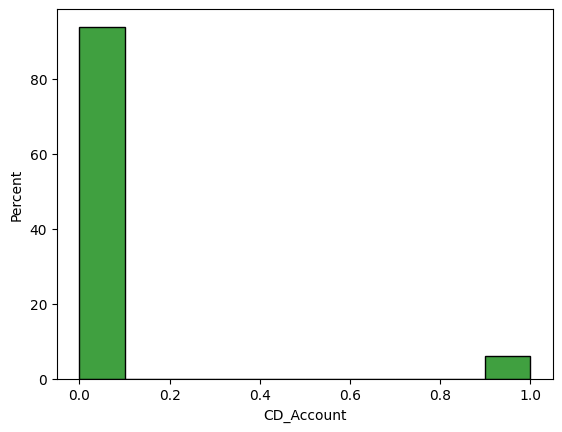

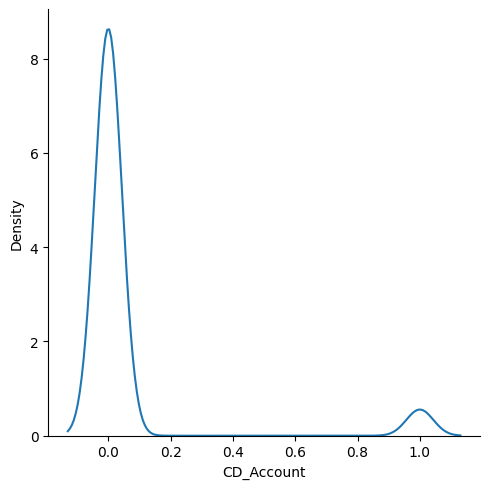

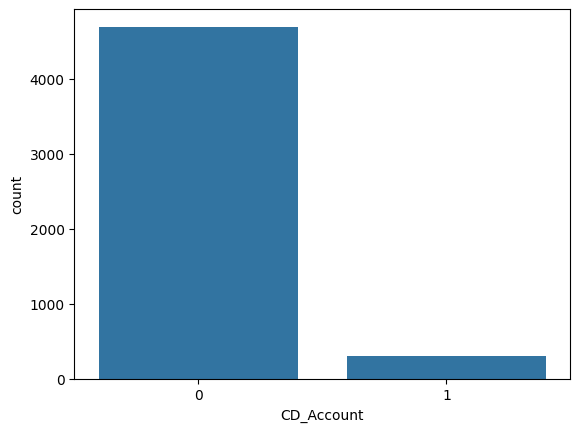

In [23]:
sns.histplot(data=data, x='CD_Account',color='green',stat="percent",bins=10)
plt.show()
sns.displot(data=data,x='CD_Account',kind='kde')
plt.show()
sns.countplot(data=data,x='CD_Account')
plt.show()


number of customers using deposit account is way low compared to those who are not using

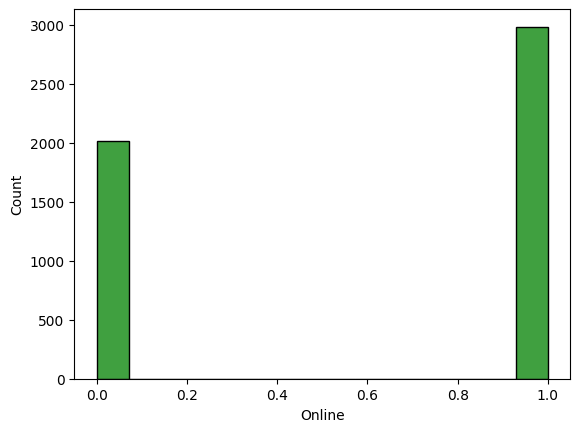

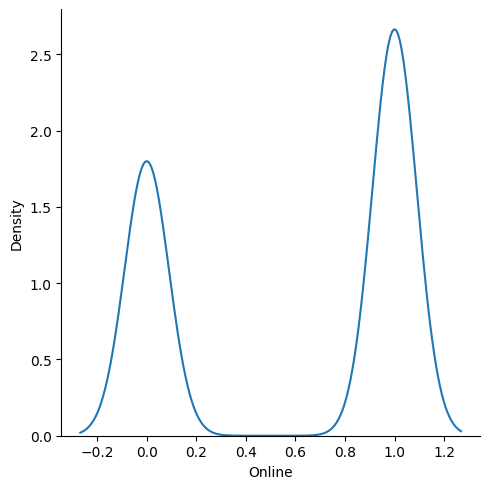

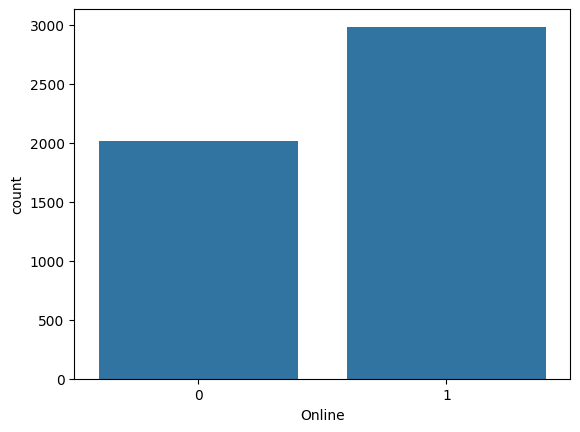

In [24]:
sns.histplot(data=data, x='Online',color='green')
plt.show()
sns.displot(data=data,x='Online',kind='kde')
plt.show()
sns.countplot(data=data,x='Online')
plt.show()

Online account is trending

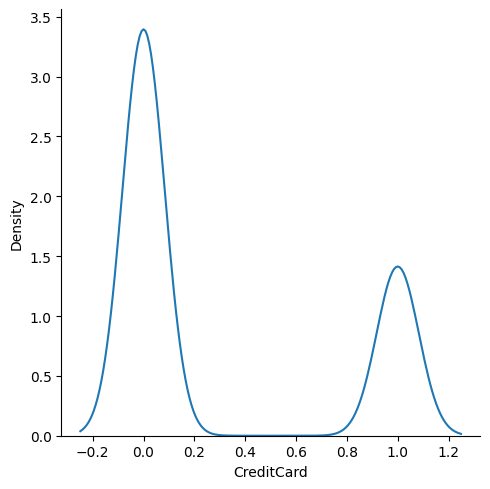

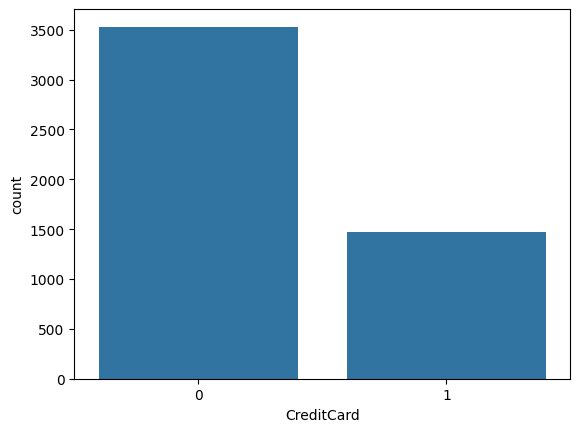

CreditCard
0    3530
1    1470
Name: count, dtype: int64


In [25]:
#2. How many customers have credit cards?

sns.displot(data=data,x='CreditCard',kind='kde')
plt.show()
sns.countplot(data=data,x='CreditCard')
plt.show()
getCredit_card_count = data['CreditCard'].value_counts()
print(getCredit_card_count)

From the above graph could see that from total 5000 customers data 3530 customers do not have credit card, and only 1470 customers are having credit card.

Bivariate analysis and multivariate analysis

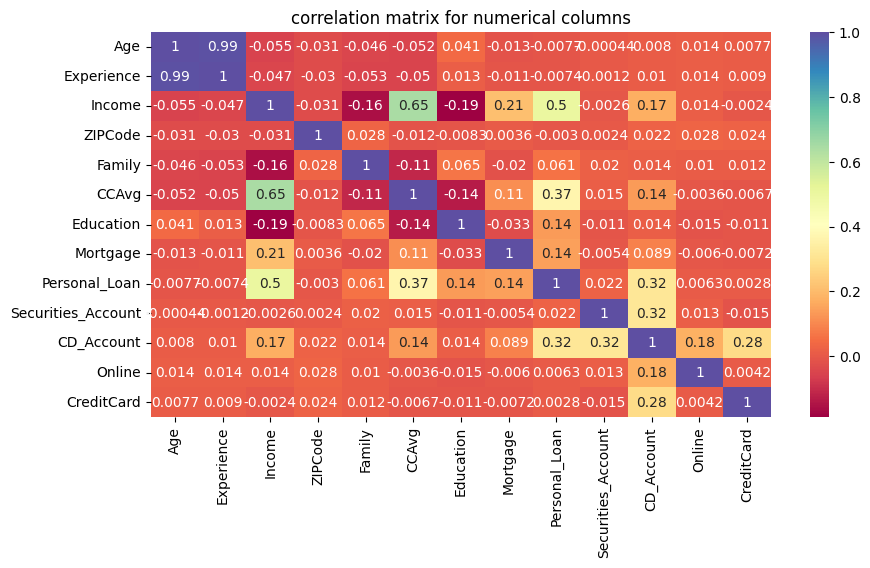

In [26]:
#What are the attributes that have a strong correlation with the target attribute (personal loan)
numeric_df = data.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot= True,cmap="Spectral")
plt.title("correlation matrix for numerical columns")
plt.show()

The strong correlation with the target attribute is CCAvg with 0.37 and CD_Account with 0.32

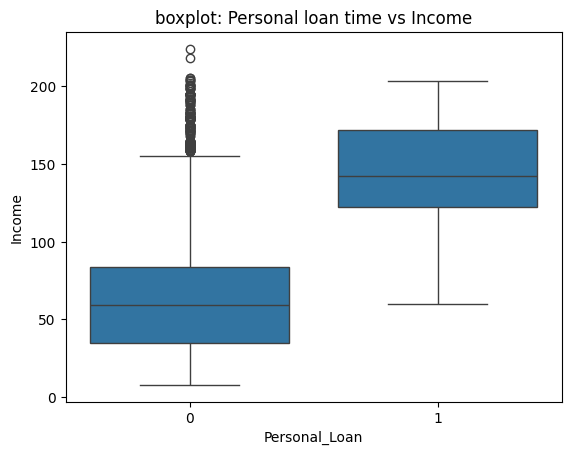

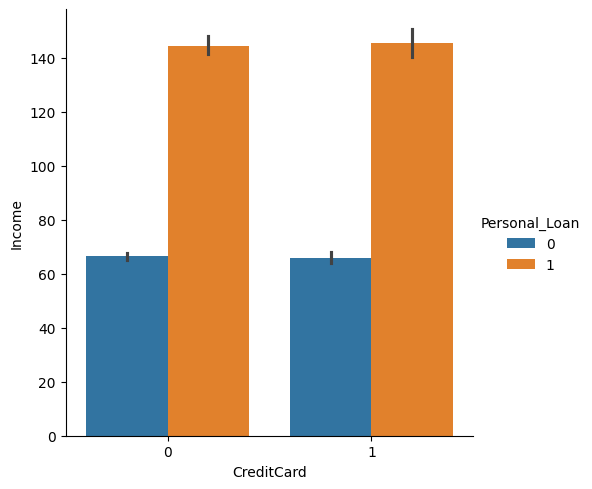

In [27]:
sns.boxplot(data=data, x='Personal_Loan',y='Income')
plt.title("boxplot: Personal loan time vs Income")
plt.show()
sns.catplot(data=data, x='CreditCard',y='Income',hue='Personal_Loan',kind='bar')
plt.show()

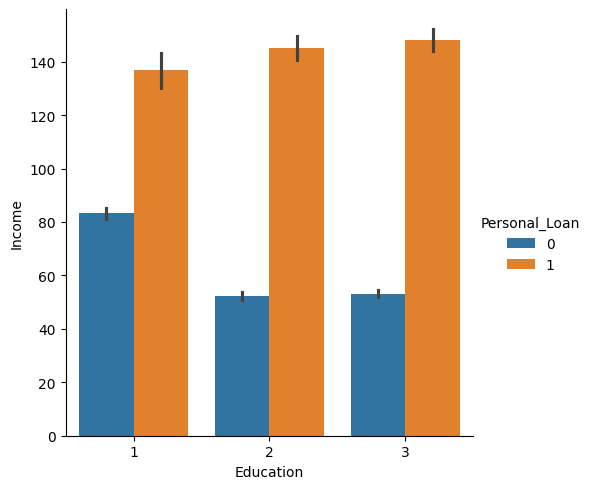

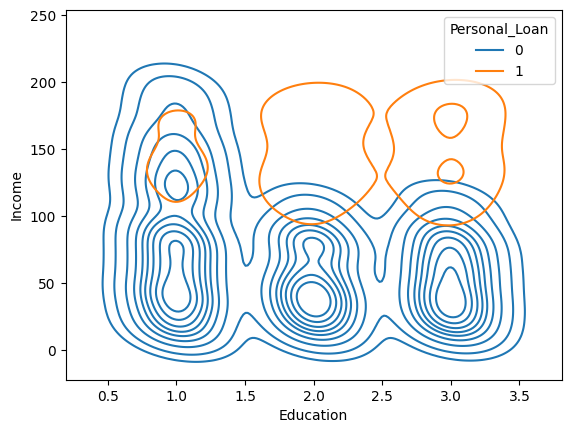

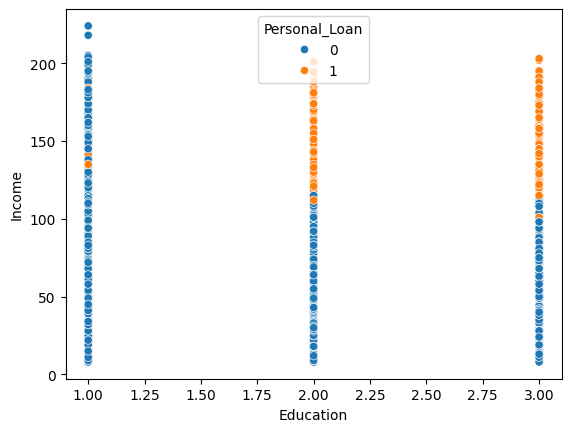

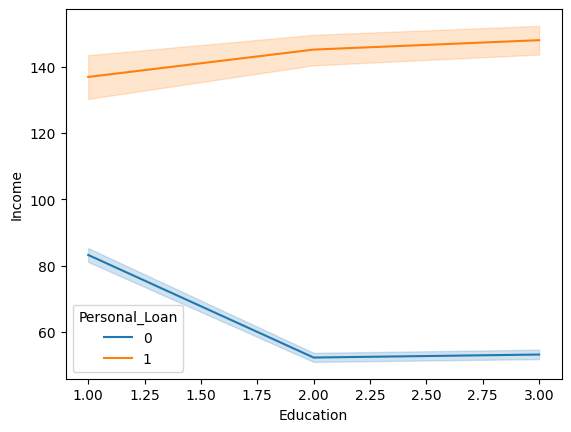

In [28]:
sns.catplot(data = data, x='Education', y='Income', hue='Personal_Loan', kind='bar')
plt.show()
sns.kdeplot(data=data, x='Education', y='Income', hue='Personal_Loan', bins=30)
plt.show()
sns.scatterplot(data=data, x='Education', y='Income', hue='Personal_Loan')
plt.show()
sns.lineplot(data=data, x='Education', y='Income',hue="Personal_Loan")
plt.show()

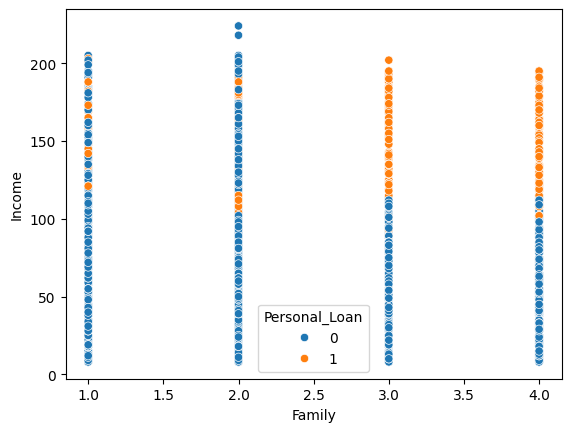

In [29]:
sns.scatterplot(x='Family', y='Income', hue='Personal_Loan', data = data)
plt.show()

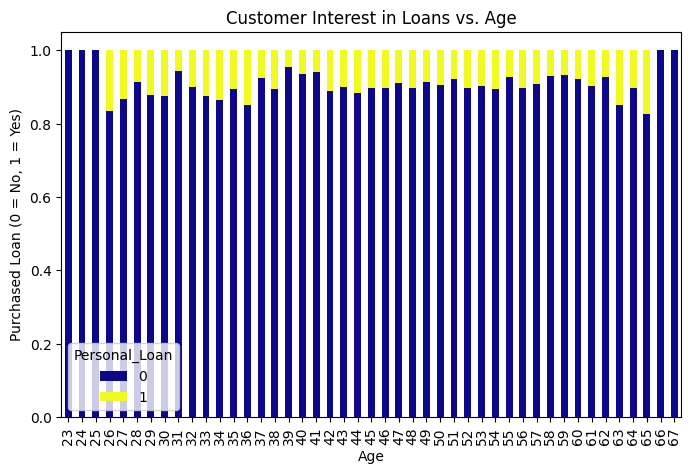

In [30]:
#4. How does a customer's interest in purchasing a loan vary with their age?
group_age= data.groupby("Age")["Personal_Loan"].value_counts(normalize=True).unstack()


group_age.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="plasma")
plt.xlabel("Age")
plt.ylabel("Purchased Loan (0 = No, 1 = Yes)")
plt.title("Customer Interest in Loans vs. Age")
plt.show()


Customer's interset in loan almost start from the age of 26 of higher and intersted upto the age of beyond 60.

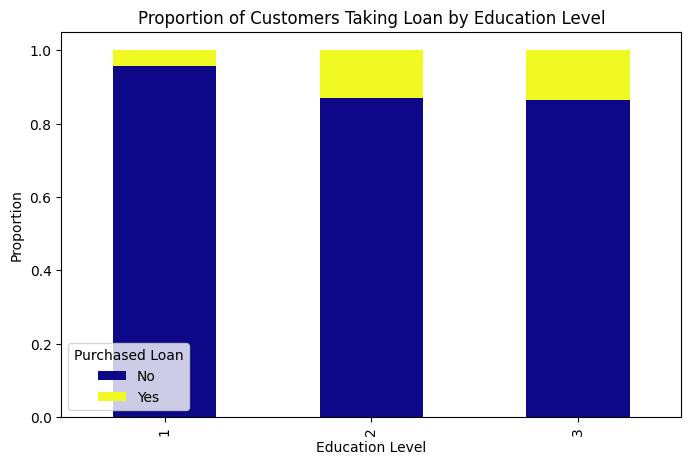

In [31]:
#5. How does a customer's interest in purchasing a loan vary with their education?

group_education= data.groupby("Education")["Personal_Loan"].value_counts(normalize=True).unstack()

group_education.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="plasma")
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.title("Proportion of Customers Taking Loan by Education Level")
plt.legend(title="Purchased Loan", labels=["No", "Yes"])
plt.show()

 From the above graph could see that the majority of the loan was taken by Graduate(2) and Advanced/Professional(3) while the Graduate(1)could be less interseted.

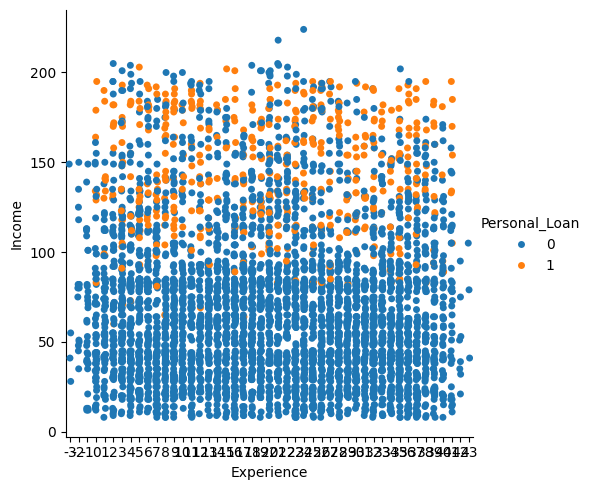

In [32]:
sns.catplot(x='Experience', y='Income', hue='Personal_Loan', data = data)
plt.show()

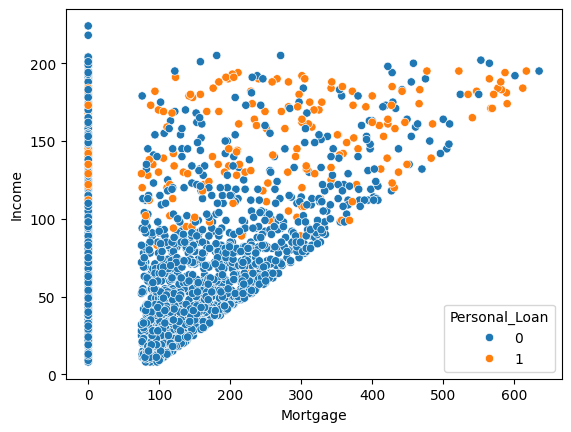

In [33]:
sns.scatterplot(x='Mortgage', y='Income', hue='Personal_Loan', data = data)
plt.show()

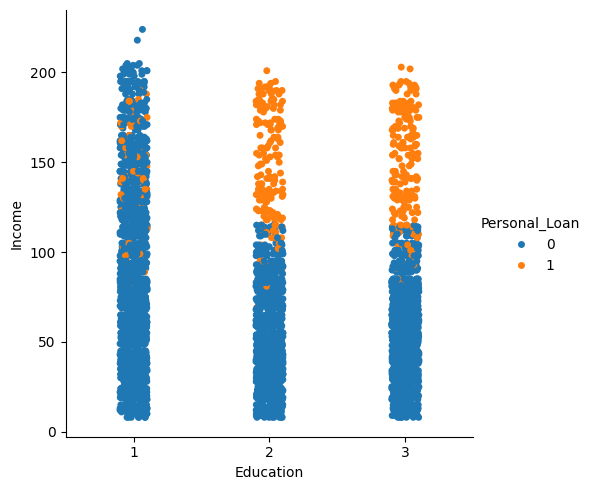

In [34]:
sns.catplot(x='Education', y='Income', hue='Personal_Loan', data = data)
plt.show()

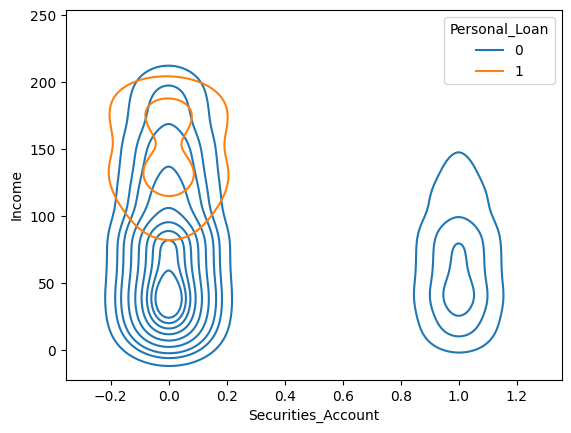

In [35]:
sns.kdeplot(x='Securities_Account', y='Income', hue='Personal_Loan', data = data)
plt.show()

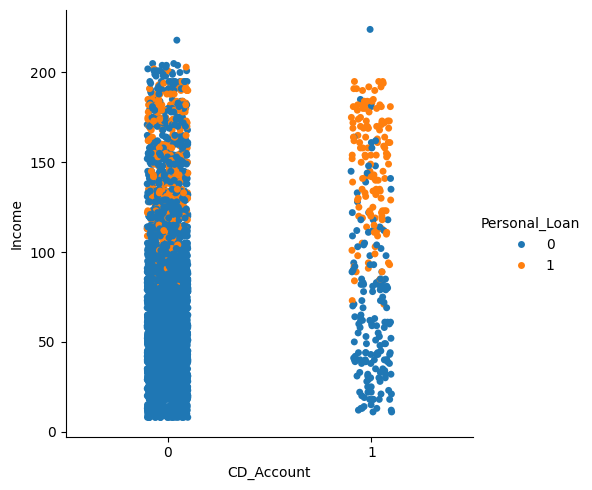

In [36]:
sns.catplot(x='CD_Account', y='Income', hue='Personal_Loan', data = data)
plt.show()

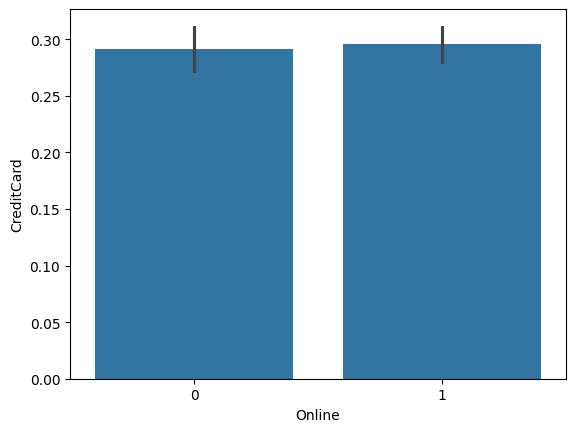

In [37]:
sns.barplot(x='Online', y='CreditCard', data = data)
plt.show()

Summary of EDA analysis:

Age distribution range is normal as mentioned before from the range of greater than 20 and less than 65

Income range is also widely spread

Customers with family size of 2 or more are likely positive to opt for the personal loan

Person without security account and income more than 100k may have chance to opt for the loan

In the means of education the level 1 seems very less chance and other 2 levels have some chance to get the loan

Person with credit card and income greater than 80k USD has a chance to get personal loan

When experience and income are combined person with more income has the opportunity

There is a high correlation between personal loan and cc_average and cd_account

Zipcodes not much valued in terms of corelation

High corelation between age and experience


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [38]:
#Missing value treatment
print(data.isnull().sum())

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


There is no missing value, hence no need to treat missing value

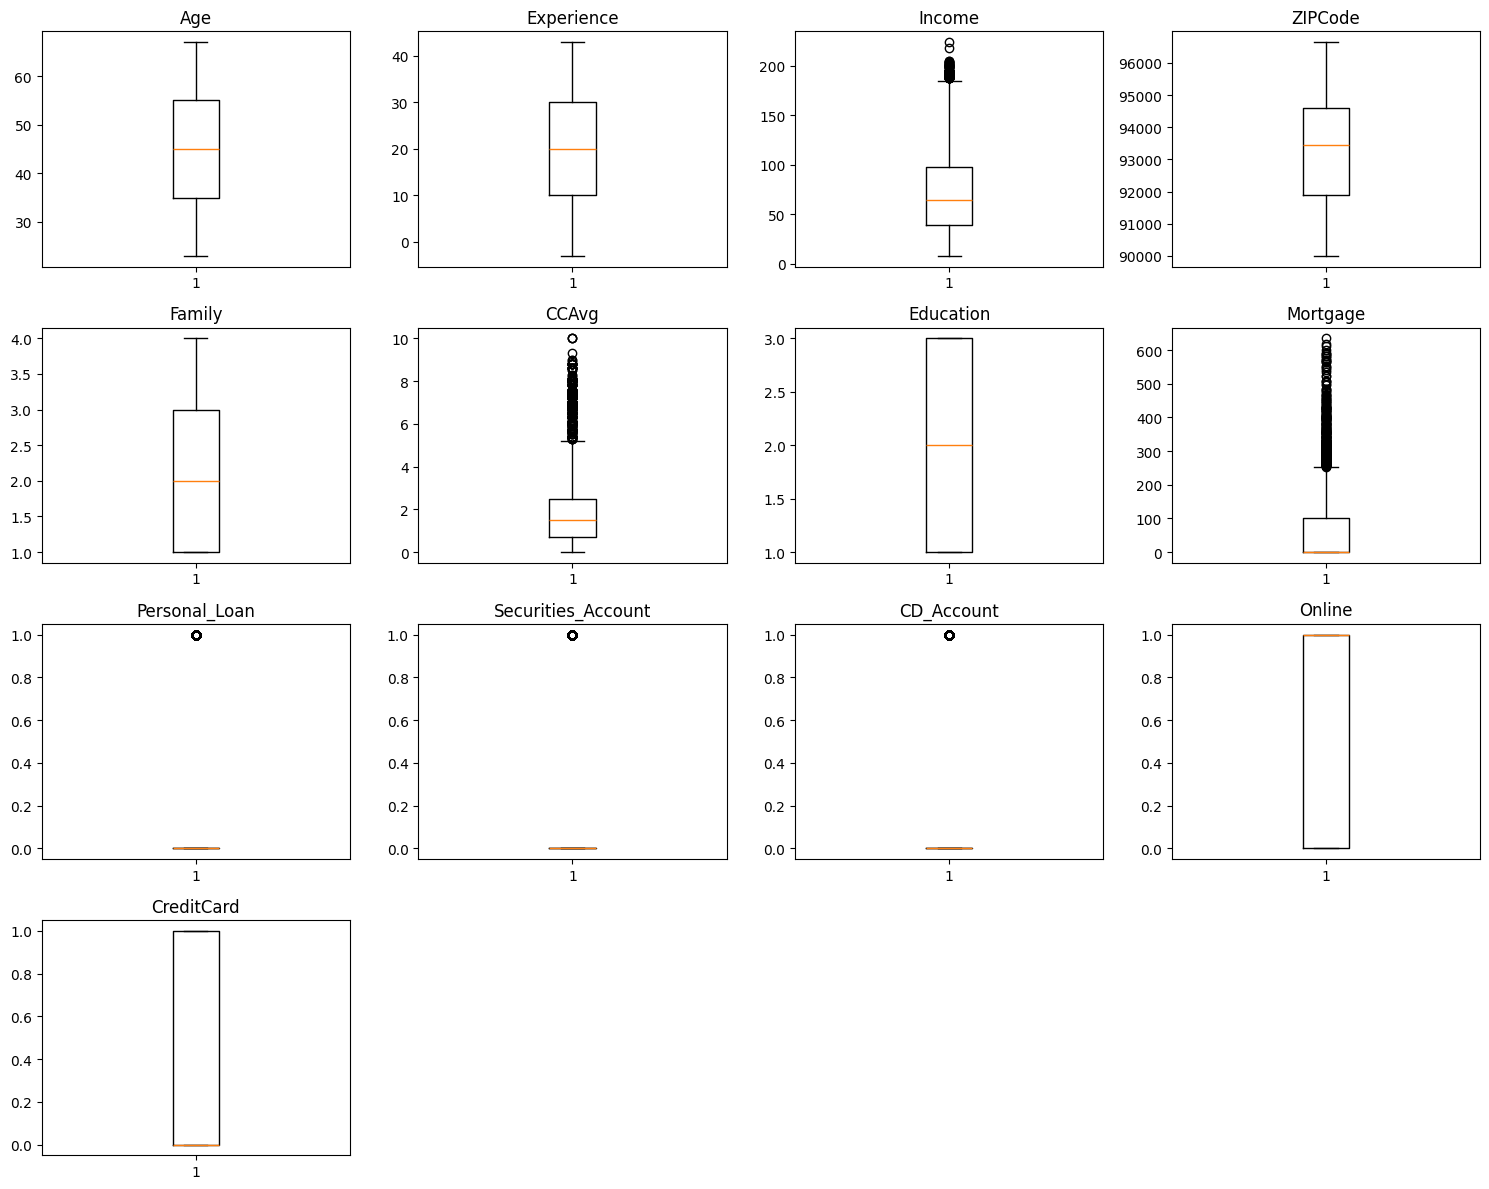

In [39]:
#* Outlier detection and treatment (if needed)

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are quite few outliers that are detected

From EDA we observed no correlation between this column and the target variable. We will drop it



In [40]:
data.drop("ZIPCode",axis=1,inplace=True)


there could not be an negative value in experience, as its found in data we should work on them


In [41]:
exp=data[data['Experience'] < 0].shape[0]
print(exp)

52


There are total 52 negative values found

In [42]:
data['Experience'] = data['Experience'].apply(lambda x : 0 if x < 0 else x)
#Input with median
data['Experience'] = data['Experience'].replace(0,data['Experience'].median())
print(data[data['Experience'] < 0].shape[0])

0


All the negative values has been handled

# Data preparation for modeling

In [43]:
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [44]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 11)
Shape of test set :  (1500, 11)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


We had seen that around 90% of observations belongs to class 0 (No Loan) and 9% observations belongs to class 1 (Loan), and this is preserved in the train and test sets

## Model Building

### Model Evaluation Criterion

#Model can make wrong predictions as:
#Predicting customer will get the loan, but in reality customer did not get the loan(FP)
#Predicting customer will not get loan, but in reality the customer will get the loan (FN)

Case that could be important:
 FN- As the bank might lose customer loan taking oppurtunity
 where as FP is resourse based.

 Reducing the False negatives:
 Greater the recall score then less will be the false negatives

In [45]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):


    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [46]:
#defining a function to plot the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Decision Tree

In [47]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Checking model performance on train set

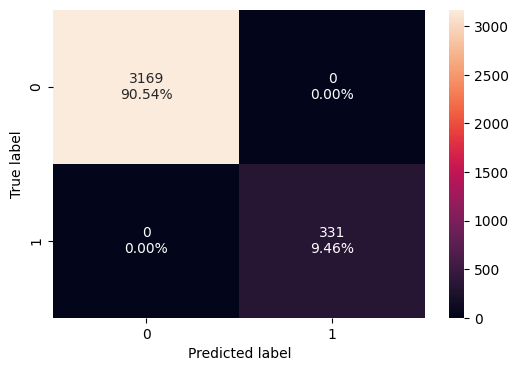

In [48]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [49]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Checking model performance on test set

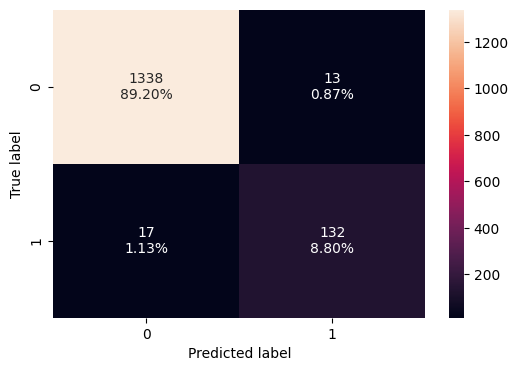

In [50]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [51]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.885906,0.910345,0.897959


Desicion tree with class blanced


In [52]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

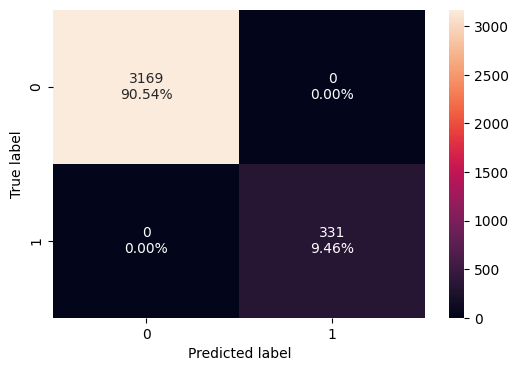

In [53]:
confusion_matrix_sklearn(model1, X_train, y_train)

Checking model performance on train set

In [54]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Checking model performance on test set

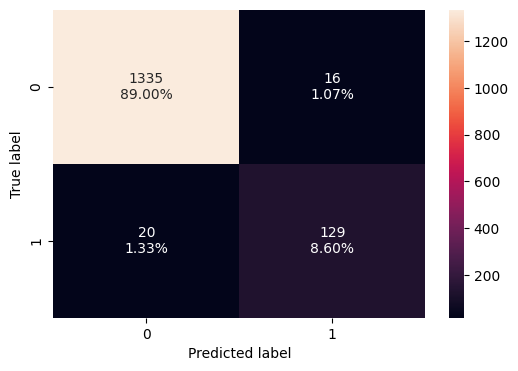

In [55]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [56]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.976,0.865772,0.889655,0.877551


Model is overfiting as there is huge difference in performance of the model in training and testing set.

## Model Performance Improvement

Pre purning- setting hyperparamter prior

In [57]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [58]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

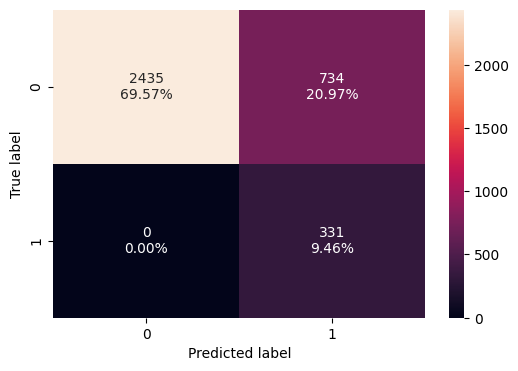

In [59]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [60]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


Checking model performance on test set

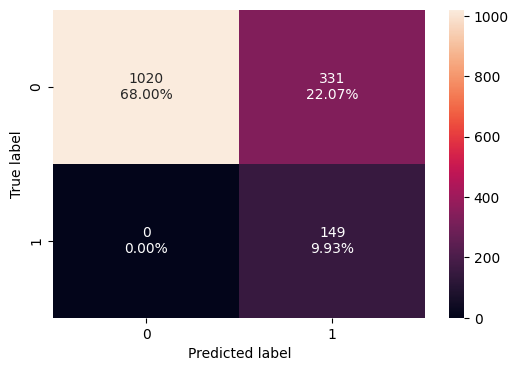

In [61]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [62]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


The Recall score in both training and testing data remains the same, which can do the same for the unseen data

In [63]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


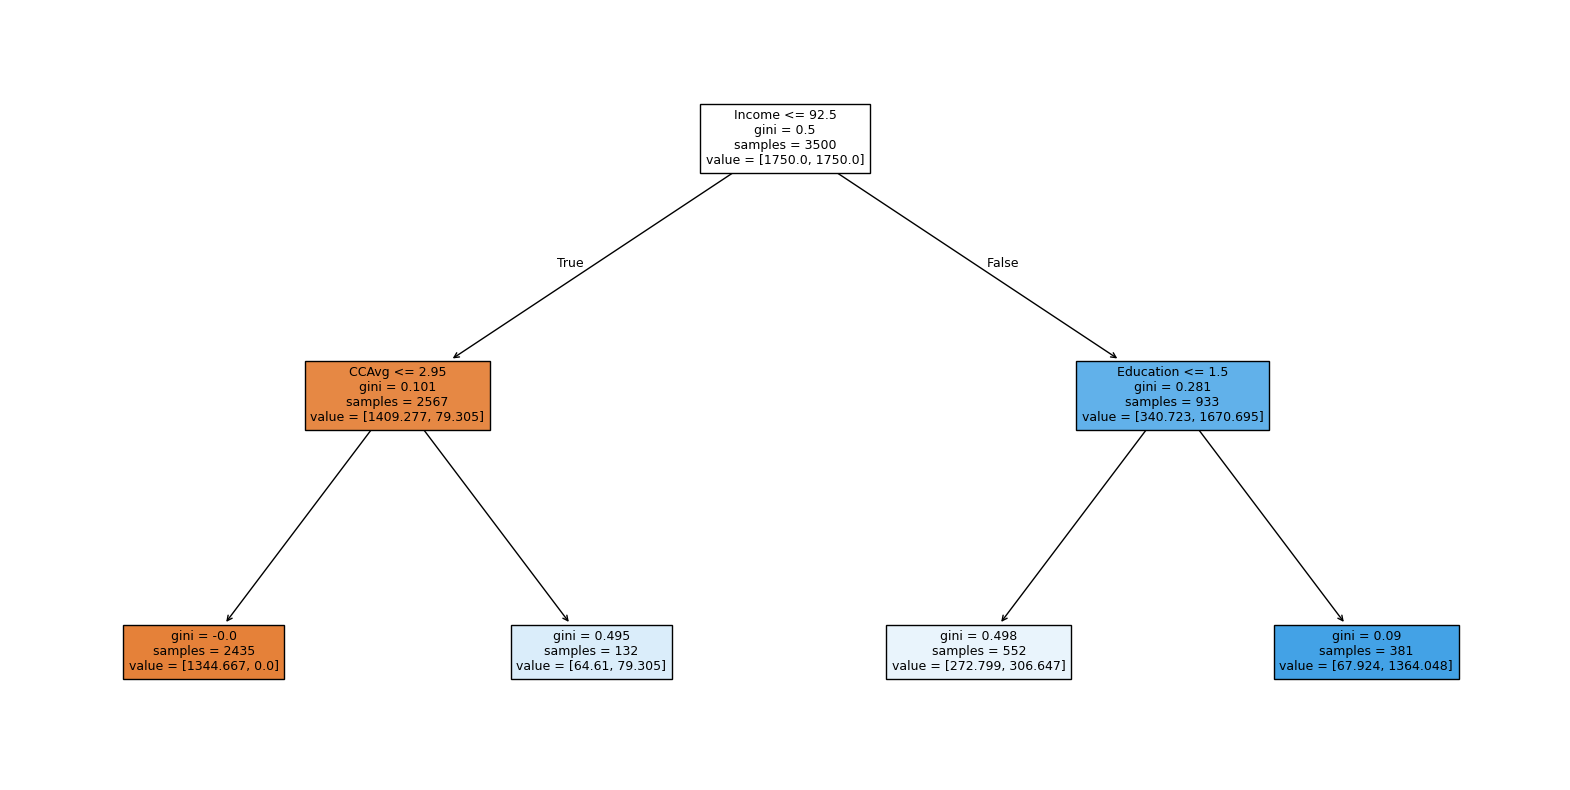

In [64]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [65]:
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [272.80, 306.65] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



In [66]:
importances = model2.feature_importances_
importances

array([0.        , 0.        , 0.82007181, 0.        , 0.06262835,
       0.11729984, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

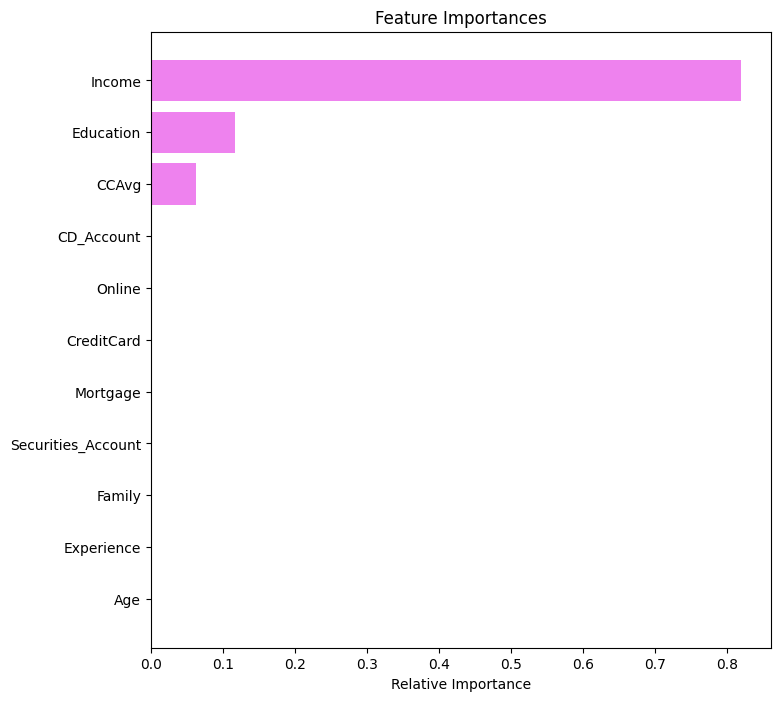

In [67]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education and Income seems to be highest feature

Decision Tree ( Post pruning)

In [68]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [69]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-8.626383e-15
1,3.853725e-19,-8.625997e-15
2,3.853725e-19,-8.625612e-15
3,3.853725e-19,-8.625226e-15
4,4.729571e-19,-8.624754e-15
5,5.255079e-19,-8.624228e-15
6,5.255079e-19,-8.623703e-15
7,7.006772e-19,-8.623002e-15
8,8.338059e-18,-8.614664e-15
9,1.257806e-17,-8.602086e-15


This values provide less meaning, should check in graph for better understanding


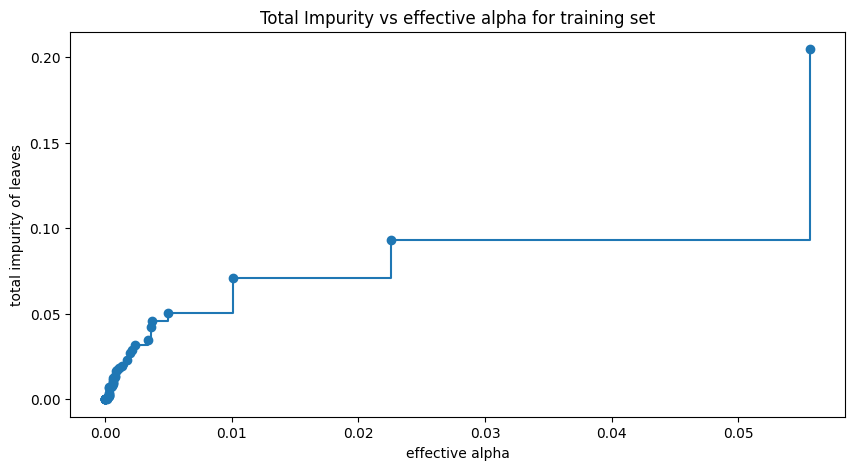

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [71]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923164


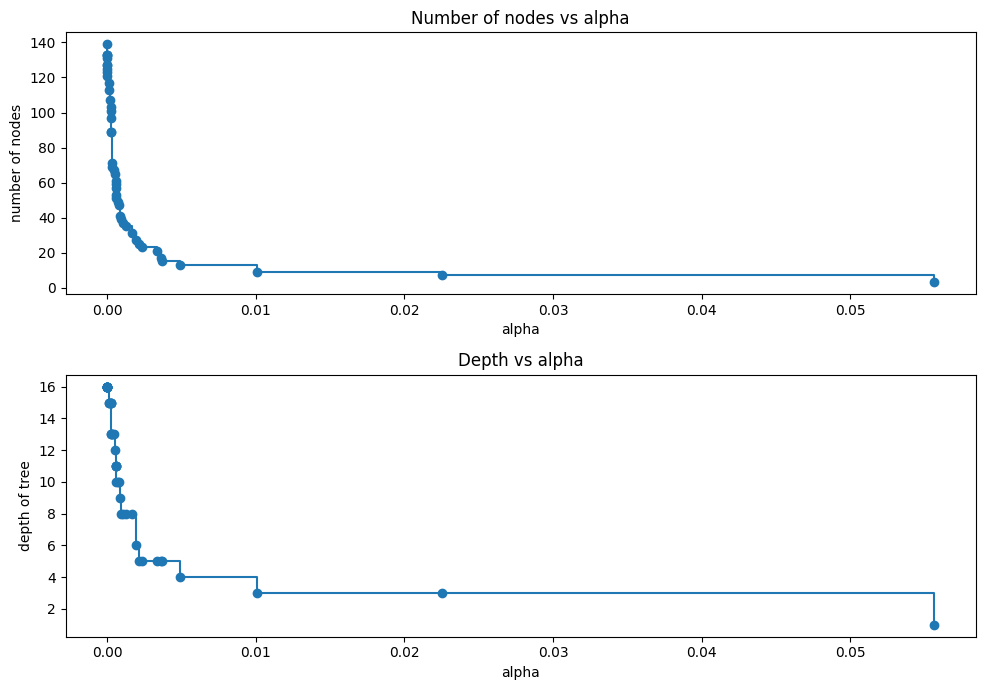

In [72]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [73]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [74]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [75]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

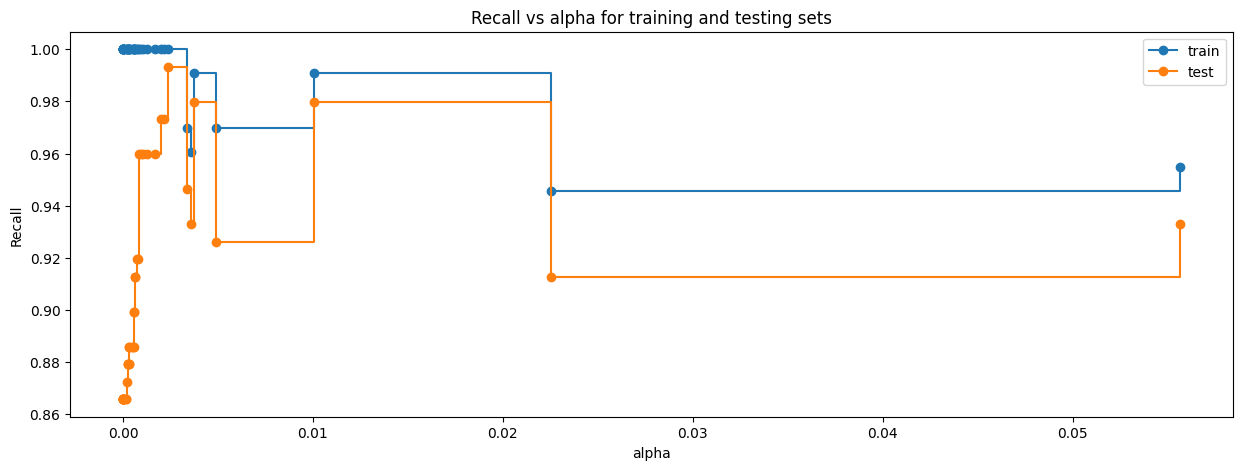

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [77]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0023758086197746484),
                       class_weight='balanced', random_state=1)


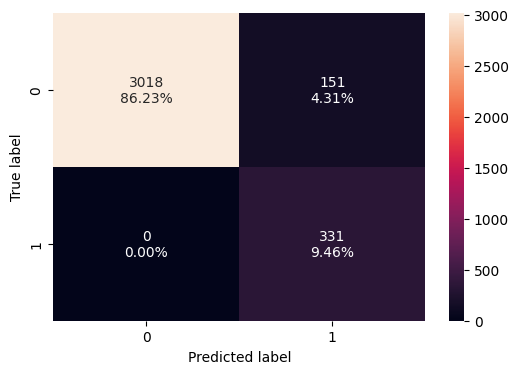

In [78]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [79]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


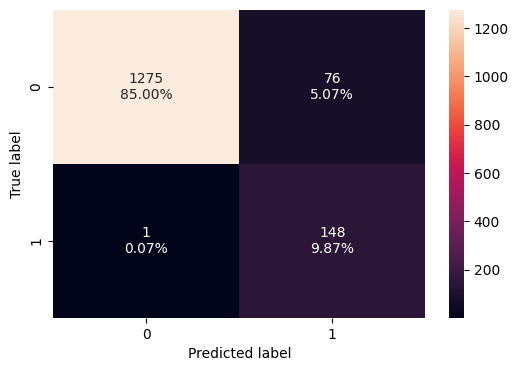

In [80]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [81]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


Visualazing tree


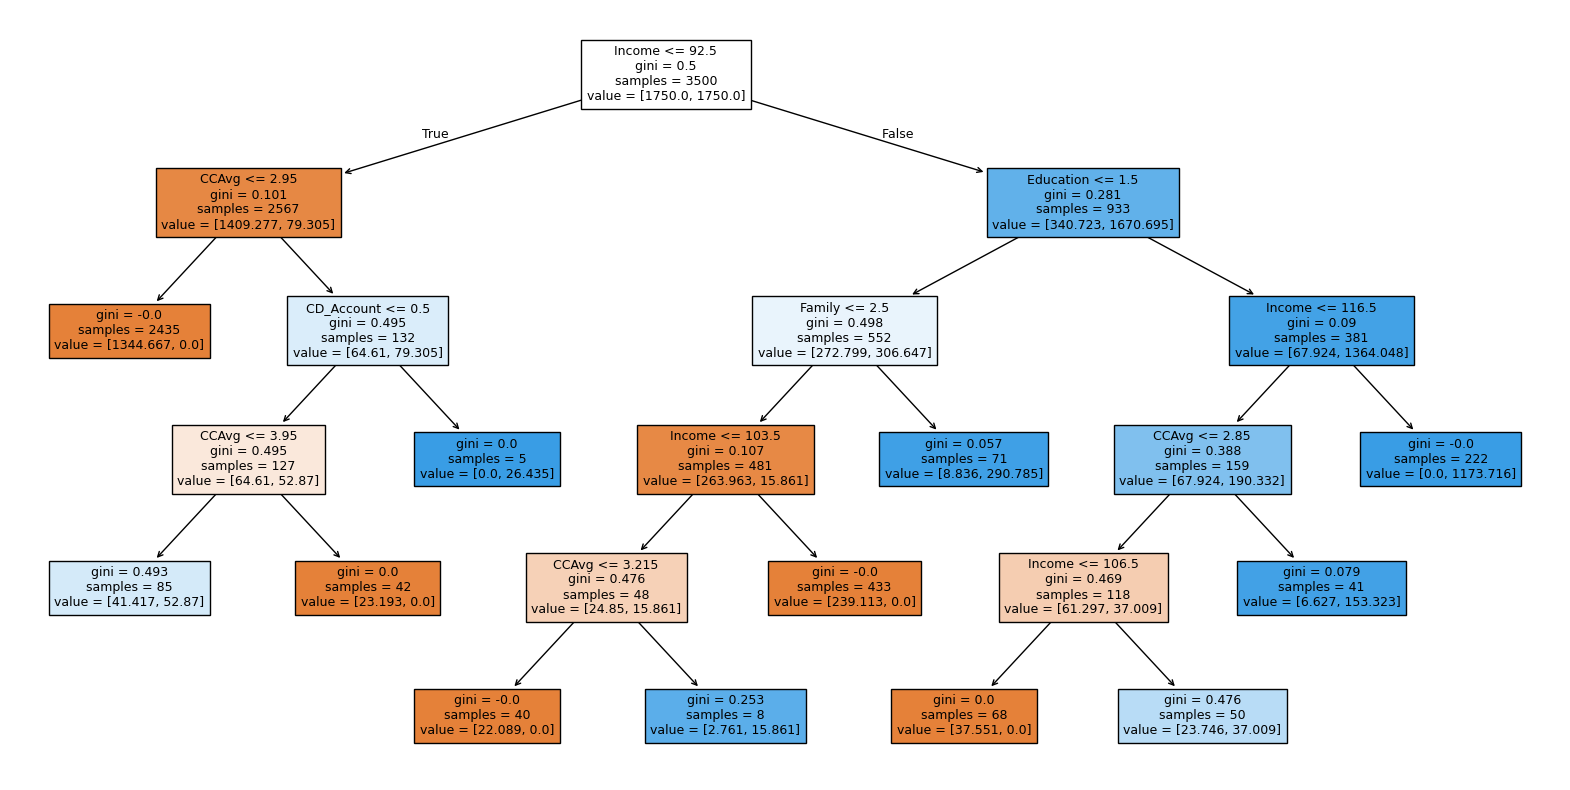

In [82]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [83]:
print(tree.export_text(model4, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   | 

In [84]:
importances = model4.feature_importances_
indices = np.argsort(importances)

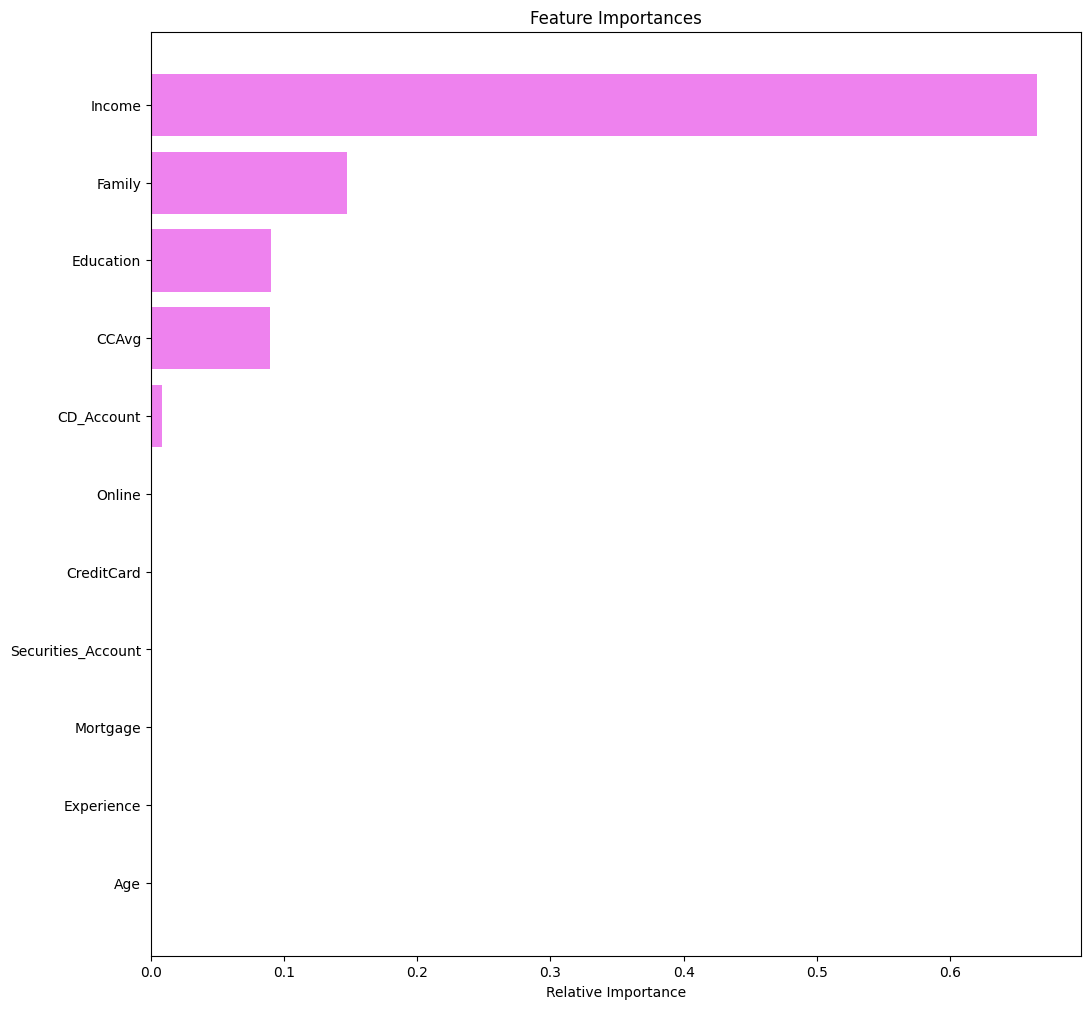

In [85]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, Family, Education, CCAvg seems to be important data

## Model Performance Comparison and Final Model Selection

In [86]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


In [87]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980000,0.976000,0.779333,0.948667
Recall,0.885906,0.865772,1.000000,0.993289
Precision,0.910345,0.889655,0.310417,0.660714
F1,0.897959,0.877551,0.473768,0.793566


Decision tree models with pre-pruning is giving high recall scores on both training and test sets.
Therefore, we are choosing the pre-pruned tree as our best model.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* From Decision tree model we identified that Age, Family Size, Education Level, Mortgage, CCAvg and CD Account are the most important variables in determining if a customer will accept a Personal Loan or not

* Customers with high spending on credit cards are good target for personal loans

* Customers who have higher experience may have a chance of rejecting the personal loans, as they may not no logner require the personal loan offers.

* Individual who earns more than 100k and family of 2 or more members can be targeted by the marketing team as well.

* Market team can also think about the customer base who has CD_account as they are exposed to less risk in means of loan/interset repayment as they have some deposit saved already.

* Target for the education level customers Graduate, Advanced/Professional as there is a trend for these levels of customers in the past.




In [89]:
!jupyter nbconvert --to html AIML_ML_Project_full_code_notebook_\(1\).ipynb


[NbConvertApp] Converting notebook AIML_ML_Project_full_code_notebook_(1).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 60 image(s).
[NbConvertApp] Writing 3191421 bytes to AIML_ML_Project_full_code_notebook_(1).html


___